In [1]:

from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Mount Google Drive to access files
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define directories
train_dir = "/content/drive/MyDrive/D-data/Train"
test_dir = "/content/drive/MyDrive/D-data/Test"

In [15]:
train_dir = "C:\\Users\\uSer\\Major__Project\\Detection-Data\\Train"
test_dir = "C:\\Users\\uSer\\Desktop\\Test"

In [16]:
# Set up data augmentation and normalization for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=10,  # Rotate images randomly
    width_shift_range=0.1,  # Shift images horizontally
    height_shift_range=0.1,  # Shift images vertically
    horizontal_flip=True  # Flip images horizontally
)

# Set up normalization for test data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Set desired image size
    batch_size=32,
    class_mode='binary',
    classes=['Fake', 'Genuine']  # Specify subfolders
)

# Load and preprocess the test data
valid_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Set desired image size
    batch_size=32,
    class_mode='binary',
    classes=['Fake', 'Genuine']  # Specify subfolders
)

# Get the class labels
class_labels = list(train_generator.class_indices.keys())

Found 4424 images belonging to 2 classes.
Found 896 images belonging to 2 classes.


In [9]:
# create CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

input_shape = (224, 224, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))



In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
# create CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16

history = model.fit_generator(train_generator,epochs=20,validation_data=valid_generator)

<ipython-input-8-26962613c49d>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,epochs=20,validation_data=valid_generator)


Epoch 1/20
139/139 [==============================] - 1649s 11s/step - loss: 0.6591 - accuracy: 0.5852 - val_loss: 0.5404 - val_accuracy: 0.7143
Epoch 2/20
139/139 [==============================] - 621s 4s/step - loss: 0.5169 - accuracy: 0.7175 - val_loss: 0.3273 - val_accuracy: 0.8214
Epoch 3/20
139/139 [==============================] - 575s 4s/step - loss: 0.3610 - accuracy: 0.8183 - val_loss: 0.1814 - val_accuracy: 0.8929
Epoch 4/20
139/139 [==============================] - 569s 4s/step - loss: 0.3069 - accuracy: 0.8580 - val_loss: 0.2884 - val_accuracy: 0.8571
Epoch 5/20
139/139 [==============================] - 572s 4s/step - loss: 0.2662 - accuracy: 0.8773 - val_loss: 0.2726 - val_accuracy: 0.8214
Epoch 6/20
139/139 [==============================] - 564s 4s/step - loss: 0.2466 - accuracy: 0.8908 - val_loss: 0.2013 - val_accuracy: 0.8929
Epoch 7/20
139/139 [==============================] - 562s 4s/step - loss: 0.2165 - accuracy: 0.9053 - val_loss: 0.1233 - val_accuracy: 0.96

In [9]:

# Evaluate the model
test_loss, test_accuracy = model.evaluate(valid_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


1/1 [==============================] - 1s 1s/step - loss: 0.4455 - accuracy: 0.8929
Test Loss: 0.4454725682735443
Test Accuracy: 0.8928571343421936


In [15]:
# Evaluate the model on the full training set
train_loss, train_accuracy = model.evaluate(train_generator)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)


139/139 [==============================] - 233s 2s/step - loss: 0.0568 - accuracy: 0.9788
Train Loss: 0.05681818723678589
Train Accuracy: 0.9787522554397583


In [19]:
# Save the trained model
model.save('/content/drive/MyDrive/Detection-Data/models/modeldetection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
# Plot training and validation metrics
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


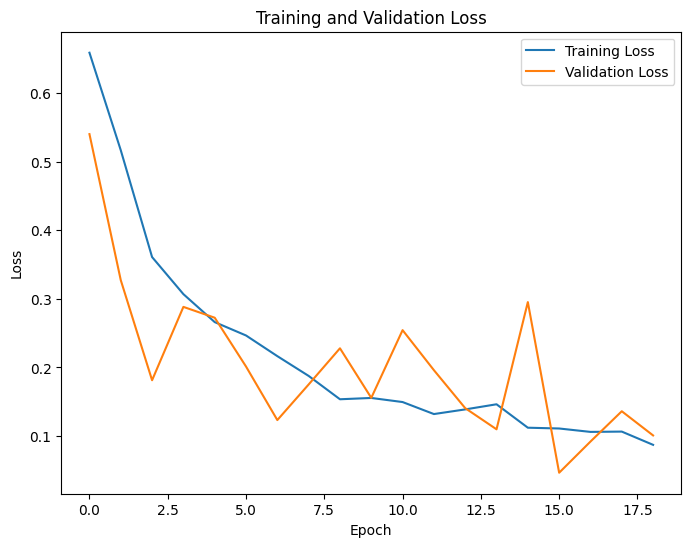

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

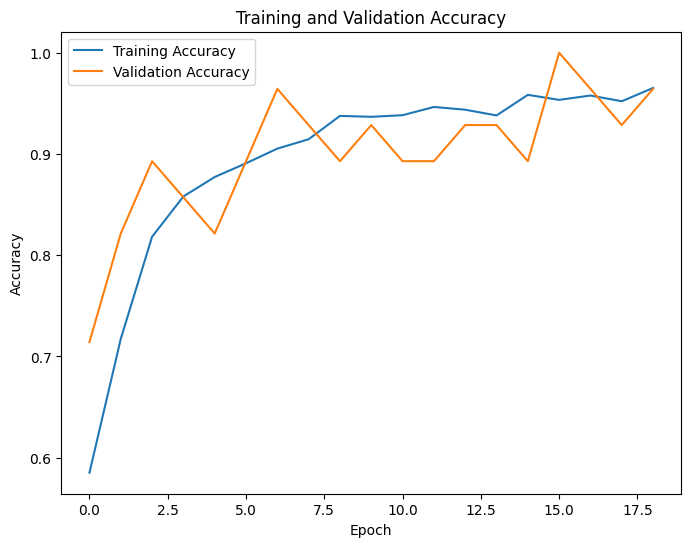

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [6]:
#load the model
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('modeldetection.h5')

In [18]:
import os
import numpy as np

# Get the class indices
class_indices = train_generator.class_indices

# Reverse the class indices dictionary to get the class labels
class_labels = {v: k for k, v in class_indices.items()}

# Get the number of samples in each class
num_samples = train_generator.samples
num_classes = len(class_labels)

# Print dataset statistics
print("Dataset Statistics:")
print("Number of Total Samples:", num_samples)
print("Number of Classes:", num_classes)

# Print class-wise information
print("\nClass-wise Information:")
for class_index, class_label in class_labels.items():
    class_count = len(os.listdir(os.path.join(train_dir, class_label)))
    class_percentage = (class_count / num_samples) * 100
    print(f"{class_label}: {class_count} samples ({class_percentage:.2f}%)")


Dataset Statistics:
Number of Total Samples: 4424
Number of Classes: 2

Class-wise Information:
Fake: 2212 samples (50.00%)
Genuine: 2212 samples (50.00%)


In [17]:
import os
import numpy as np

# Get the class indices
class_indices = valid_generator.class_indices

# Reverse the class indices dictionary to get the class labels
class_labels = {v: k for k, v in class_indices.items()}

# Get the number of samples in each class
num_samples = valid_generator.samples
num_classes = len(class_labels)

# Print dataset statistics
print("Dataset Statistics:")
print("Number of Total Samples:", num_samples)
print("Number of Classes:", num_classes)

# Print class-wise information
print("\nClass-wise Information:")
for class_index, class_label in class_labels.items():
    class_count = len(os.listdir(os.path.join(test_dir, class_label)))
    class_percentage = (class_count / num_samples) * 100
    print(f"{class_label}: {class_count} samples ({class_percentage:.2f}%)")


Dataset Statistics:
Number of Total Samples: 896
Number of Classes: 2

Class-wise Information:
Fake: 448 samples (50.00%)
Genuine: 448 samples (50.00%)
